# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# cria a coluna de faixa de latitude
sinasc['FAIXALATITUDE'] = sinasc['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

In [5]:
# aplica o groupby() nas colunas QTDFILVIVO e QTDFILMORT com o aggregate
sinasc.groupby('FAIXALATITUDE')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
FAIXALATITUDE                                                                
Abaixo de -10.5    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626   
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                 
                       sum     mean  min   max median       std       var  
FAIXALATITUDE                                                              
Abaixo de -10.5     3106.0  0.24258  0.0  28.0    0.0  0.599444  0.359333  
Acima de -10.5      3538.0  0.29177  0.0   9.0    0.0  0.627856  0.394204

In [6]:
# dataframe aperfeiçoado através do pivot_table
sinasc.pivot_table(
    values=['QTDFILVIVO', 'QTDFILMORT'],
    index=['FAIXALATITUDE'],
    aggfunc={
        'QTDFILVIVO': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ],
        'QTDFILMORT': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ]
    },
    dropna=True
)

QTDFILMORT                                         \
                Desvio Padrão Mediana Máximo    Média Mínimo    Soma   
FAIXALATITUDE                                                          
Abaixo de -10.5      0.599444     0.0   28.0  0.24258    0.0  3106.0   
Acima de -10.5       0.627856     0.0    9.0  0.29177    0.0  3538.0   

                             QTDFILVIVO                                  \
                Variância Desvio Padrão Mediana Máximo     Média Mínimo   
FAIXALATITUDE                                                             
Abaixo de -10.5  0.359333      1.138256     1.0   30.0  0.980012    0.0   
Acima de -10.5   0.394204      1.198613     1.0   12.0  1.129317    0.0   

                                    
                    Soma Variância  
FAIXALATITUDE                       
Abaixo de -10.5  12601.0  1.295626  
Acima de -10.5   14226.0  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
# cria a coluna de faixa de latitude
sinasc['ÁREAMUNICIPIOS'] = sinasc['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

In [8]:
# aplica o groupby() nas colunas QTDFILVIVO e QTDFILMORT com o aggregate
sinasc.groupby('ÁREAMUNICIPIOS')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
ÁREAMUNICIPIOS                                                              
Abaixo de 3000     4774.0  0.924298  0.0  30.0    1.0  1.075338  1.156352   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
ÁREAMUNICIPIOS                                                             
Abaixo de 3000     1261.0  0.244949  0.0   4.0    0.0  0.551262  0.303889  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

In [9]:
# dataframe aperfeiçoado através do pivot_table
sinasc.pivot_table(
    values=['QTDFILVIVO', 'QTDFILMORT'],
    index=['ÁREAMUNICIPIOS'],
    aggfunc={
        'QTDFILVIVO': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ],
        'QTDFILMORT': [
            ("Soma", "sum"),
            ("Média", "mean"),
            ("Mínimo", "min"),
            ("Máximo", "max"),
            ("Mediana", "median"),
            ("Desvio Padrão", "std"),
            ("Variância", "var")
        ]
    },
    dropna=True
)

QTDFILMORT                                          \
               Desvio Padrão Mediana Máximo     Média Mínimo    Soma   
ÁREAMUNICIPIOS                                                         
Abaixo de 3000      0.551262     0.0    4.0  0.244949    0.0  1261.0   
Acima de 3000       0.629081     0.0   28.0  0.272116    0.0  5383.0   

                            QTDFILVIVO                                  \
               Variância Desvio Padrão Mediana Máximo     Média Mínimo   
ÁREAMUNICIPIOS                                                           
Abaixo de 3000  0.303889      1.075338     1.0   30.0  0.924298    0.0   
Acima de 3000   0.395743      1.191750     1.0   14.0  1.086890    0.0   

                                   
                   Soma Variância  
ÁREAMUNICIPIOS                     
Abaixo de 3000   4774.0  1.156352  
Acima de 3000   22053.0  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# describe() para poder categorizar as latitudes
sinasc['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [11]:
# categoriza as altitudes, dropa valorez vazios e salva na variável 'municipio_alt'
municipio_alt = pd.cut(sinasc['munResAlt'], [0, 87, 153, 191, 595]).dropna()
municipio_alt

0        (191, 595]
1        (191, 595]
2        (191, 595]
3        (191, 595]
4        (191, 595]
            ...    
27023    (191, 595]
27024    (191, 595]
27025    (191, 595]
27026    (191, 595]
27027    (191, 595]
Name: munResAlt, Length: 27027, dtype: category
Categories (4, interval[int64, right]): [(0, 87] < (87, 153] < (153, 191] < (191, 595]]

In [12]:
# aplica o groupby()
sinasc.groupby(municipio_alt)[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

C:\Users\henri\AppData\Local\Temp\ipykernel_21308\3571720727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc.groupby(municipio_alt)[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDFILVIVO                                                  \
                  sum      mean  min   max median       std       var   
munResAlt                                                               
(0, 87]        8976.0  1.177798  0.0  12.0    1.0  1.236798  1.529670   
(87, 153]      5430.0  1.189225  0.0  14.0    1.0  1.319208  1.740309   
(153, 191]     6354.0  0.922608  0.0   9.0    1.0  1.041525  1.084773   
(191, 595]     6066.0  0.950784  0.0  30.0    1.0  1.079861  1.166099   

           QTDFILMORT                                                  
                  sum      mean  min   max median       std       var  
munResAlt                                                              
(0, 87]        2282.0  0.309550  0.0   9.0    0.0  0.642375  0.412645  
(87, 153]      1238.0  0.284860  0.0   9.0    0.0  0.639574  0.409055  
(153, 191]     1585.0  0.230949  0.0   5.0    0.0  0.534301  0.285477  
(191, 595]     1538.0  0.242281  0.0  28.0    0.0  0.638724  0.407968

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
# mapeia a região
sinasc['regiao_imediata'] = sinasc['munResNome'].map(imediatas)

In [15]:
# transforma a coluna DTNASC em data de nascimento
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

In [16]:
# cria a coluna 'ano_mes'
sinasc['ano_mes'] = sinasc['DTNASC'].dt.to_period('M')

In [17]:
# agrupa a idade média das mães
idade_media = sinasc.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()

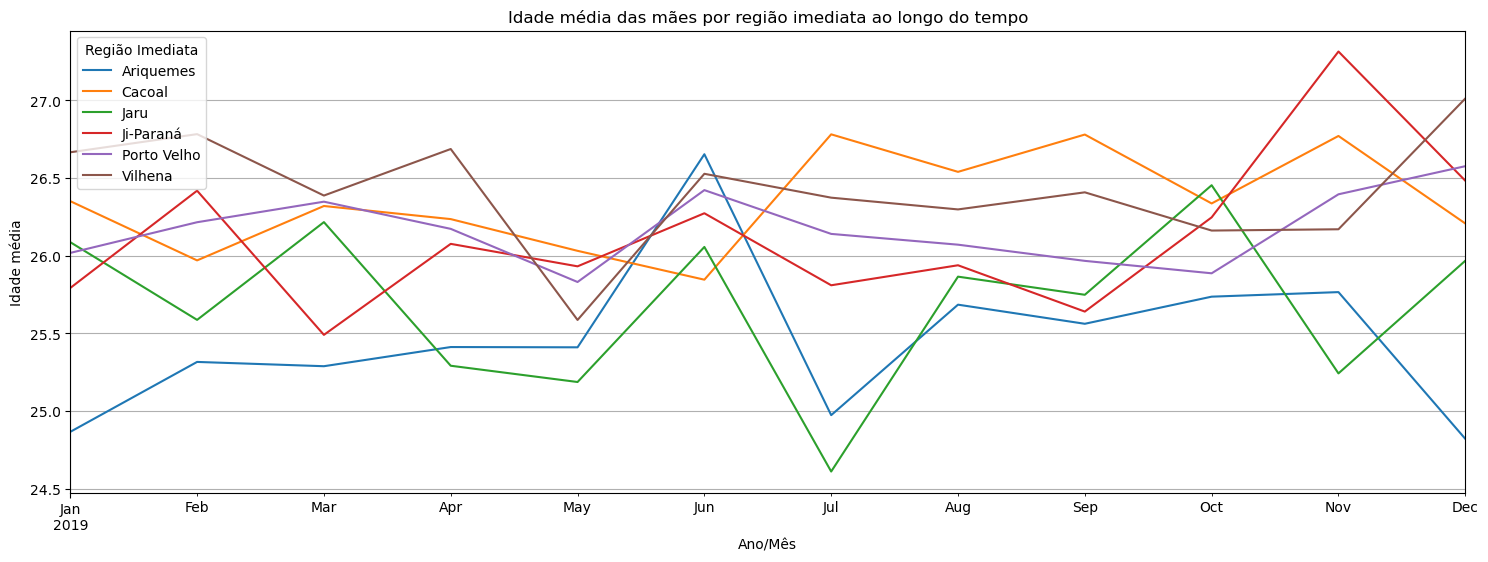

In [18]:
idade_media.plot(figsize=(18,6))
plt.title('Idade média das mães por região imediata ao longo do tempo')
plt.ylabel('Idade média')
plt.xlabel('Ano/Mês')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [19]:
url_idh = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'

In [20]:
tabelas_idh = pd.read_html(url_idh, header=0)
tabelas_idh

[              Posição                  Município      Dados de 2010  \
 0             Posição                  Município      IDH municipal   
 1    IDH-M muito alto           IDH-M muito alto   IDH-M muito alto   
 2    nenhum município           nenhum município   nenhum município   
 3          IDH-M alto                 IDH-M alto         IDH-M alto   
 4                   1                Porto Velho              0.736   
 5                   2                    Vilhena              0.731   
 6                   3                     Cacoal              0.718   
 7                   4                  Ji-Paraná              0.714   
 8                   5              Pimenta Bueno              0.710   
 9                   6                  Ariquemes              0.702   
 10                  7             Rolim de Moura              0.700   
 11        IDH-M médio                IDH-M médio        IDH-M médio   
 12                  8                 Cerejeiras              0

In [21]:
df_idh = tabelas_idh[0]
df_idh

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3
0,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
1,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto
2,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
3,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
4,1,Porto Velho,0.736,0.764,0.819,0.638
5,2,Vilhena,0.731,0.734,0.808,0.659
6,3,Cacoal,0.718,0.727,0.821,0.620
7,4,Ji-Paraná,0.714,0.728,0.810,0.617
8,5,Pimenta Bueno,0.710,0.726,0.803,0.613
9,6,Ariquemes,0.702,0.716,0.806,0.600


In [22]:
# cria coluna com os valores numéricos do IDH
df_idh['valor_idh'] = pd.to_numeric(df_idh['Dados de 2010'], errors='coerce')
df_idh.head()

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3,valor_idh
0,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,NaN
1,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,NaN
2,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,NaN
3,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,NaN
4,1,Porto Velho,0.736,0.764,0.819,0.638,0.736


In [23]:
# filtra apenas as linhas com valores não-nulos de IDH
df_idh_numeros = df_idh[df_idh['valor_idh'].notnull()].copy()
df_idh_numeros.head(10)

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3,valor_idh
4,1,Porto Velho,0.736,0.764,0.819,0.638,0.736
5,2,Vilhena,0.731,0.734,0.808,0.659,0.731
6,3,Cacoal,0.718,0.727,0.821,0.620,0.718
7,4,Ji-Paraná,0.714,0.728,0.810,0.617,0.714
8,5,Pimenta Bueno,0.710,0.726,0.803,0.613,0.710
9,6,Ariquemes,0.702,0.716,0.806,0.600,0.702
10,7,Rolim de Moura,0.700,0.709,0.808,0.598,0.700
12,8,Cerejeiras,0.692,0.688,0.799,0.602,0.692
13,9,Jaru,0.689,0.687,0.825,0.577,0.689
14,10,Colorado do Oeste,0.685,0.676,0.814,0.584,0.685


In [24]:
# cria uma função para classificar a faixa de IDH
def faixa_idh(valor):
  if valor < 0.6:
    return 'Baixo'
  elif valor < 0.7:
    return 'Médio'
  else:
    return 'Alto'

In [25]:
# aplica a função e cria a nova coluna 'Faixa'
df_idh_numeros['Faixa'] = df_idh_numeros['valor_idh'].apply(faixa_idh)
df_idh_numeros.head(10)

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3,valor_idh,Faixa
4,1,Porto Velho,0.736,0.764,0.819,0.638,0.736,Alto
5,2,Vilhena,0.731,0.734,0.808,0.659,0.731,Alto
6,3,Cacoal,0.718,0.727,0.821,0.620,0.718,Alto
7,4,Ji-Paraná,0.714,0.728,0.810,0.617,0.714,Alto
8,5,Pimenta Bueno,0.710,0.726,0.803,0.613,0.710,Alto
9,6,Ariquemes,0.702,0.716,0.806,0.600,0.702,Alto
10,7,Rolim de Moura,0.700,0.709,0.808,0.598,0.700,Alto
12,8,Cerejeiras,0.692,0.688,0.799,0.602,0.692,Médio
13,9,Jaru,0.689,0.687,0.825,0.577,0.689,Médio
14,10,Colorado do Oeste,0.685,0.676,0.814,0.584,0.685,Médio


In [26]:
# seleciona apenas as colunas desejadas
tabela_IDH = df_idh_numeros[['Município', 'valor_idh', 'Faixa']].reset_index(drop=True)
tabela_IDH

,Município,valor_idh,Faixa
0,Porto Velho,0.736,Alto
1,Vilhena,0.731,Alto
2,Cacoal,0.718,Alto
3,Ji-Paraná,0.714,Alto
4,Pimenta Bueno,0.710,Alto
5,Ariquemes,0.702,Alto
6,Rolim de Moura,0.700,Alto
7,Cerejeiras,0.692,Médio
8,Jaru,0.689,Médio
9,Colorado do Oeste,0.685,Médio


In [27]:
import unidecode

In [28]:
# SINASC
sinasc['municipio_padronizado'] = sinasc['munResNome'].apply(lambda x: unidecode.unidecode(str(x)).strip().lower())

In [29]:
# tabela_IDH
tabela_IDH['municipio_padronizado'] = tabela_IDH['Município'].apply(lambda x: unidecode.unidecode(str(x)).strip().lower())

In [30]:
df_merged = pd.merge(sinasc, tabela_IDH[['municipio_padronizado', 'valor_idh', 'Faixa']], 
            on='municipio_padronizado', how='left')

In [31]:
media_apgar = df_merged.groupby('Faixa')['APGAR5'].mean().round(2)
print(media_apgar)

Faixa
Alto     9.17
Baixo    9.17
Médio    9.20
Name: APGAR5, dtype: float64


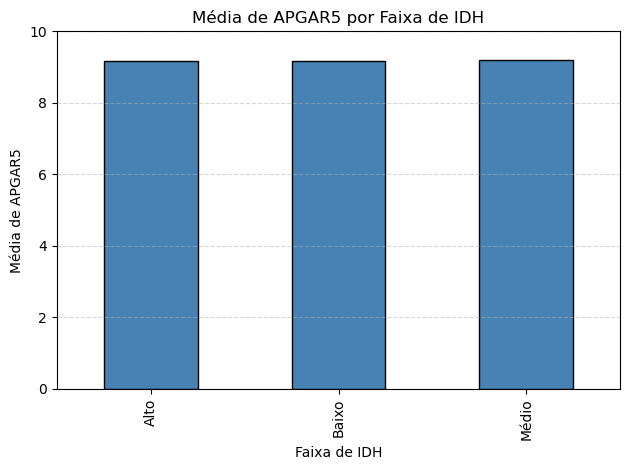

In [32]:
media_apgar.sort_values().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média de APGAR5 por Faixa de IDH')
plt.xlabel('Faixa de IDH')
plt.ylabel('Média de APGAR5')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

-> A média de APGAR5 não está correlacionada ao IDH pois em todos os casos o APGAR5 é alto, o que mostra um boa politica de saúde neonatal, independentemente se é uma cidade interior ou capital.

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [33]:
url_ifdm = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'

In [34]:
tabelas_ifdm = pd.read_html(url_ifdm, header=0)
tabelas_ifdm

[                     Posição                  Município  \
 0       Desenvolvimento alto       Desenvolvimento alto   
 1           nenhum município           nenhum município   
 2   Desenvolvimento moderado   Desenvolvimento moderado   
 3                         1º                  Ariquemes   
 4                         2º                    Vilhena   
 5                         3º              Pimenta Bueno   
 6                         4º                Porto Velho   
 7                         5º                  Ji-Paraná   
 8                         6º                     Cacoal   
 9                         7º        Santa Luzia d'Oeste   
 10                        8º             Rolim de Moura   
 11                        9º                Chupinguaia   
 12                       10º      São Miguel do Guaporé   
 13                       11º       Pimenteiras do Oeste   
 14                       12º              Teixeirópolis   
 15                       13º          C

In [35]:
# transforma em dataframe
df_ifdm = tabelas_ifdm[0]
df_ifdm.head()

,Posição,Município,IFDM Consolidado (2013)
0,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
1,nenhum município,nenhum município,nenhum município
2,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
3,1º,Ariquemes,0.7746
4,2º,Vilhena,0.7465


In [36]:
# cria uma coluna com os valores numéricos do IFDM
df_ifdm['valor_ifdm'] = pd.to_numeric(df_ifdm['IFDM Consolidado (2013)'], errors='coerce')
df_ifdm.head()

,Posição,Município,IFDM Consolidado (2013),valor_ifdm
0,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto,NaN
1,nenhum município,nenhum município,nenhum município,NaN
2,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado,NaN
3,1º,Ariquemes,0.7746,0.7746
4,2º,Vilhena,0.7465,0.7465


In [37]:
# filtra as linhas que não têm valores nulos
df_ifdm_num = df_ifdm[df_ifdm['valor_ifdm'].notnull()].copy()
df_ifdm_num

,Posição,Município,IFDM Consolidado (2013),valor_ifdm
3,1º,Ariquemes,0.7746,0.7746
4,2º,Vilhena,0.7465,0.7465
5,3º,Pimenta Bueno,0.7383,0.7383
6,4º,Porto Velho,0.7257,0.7257
7,5º,Ji-Paraná,0.7117,0.7117
8,6º,Cacoal,0.7111,0.7111
9,7º,Santa Luzia d'Oeste,0.6850,0.6850
10,8º,Rolim de Moura,0.6785,0.6785
11,9º,Chupinguaia,0.6766,0.6766
12,10º,São Miguel do Guaporé,0.6699,0.6699


In [38]:
# cria uma função para classificar o índice de IFDM
def indice_ifdm(valor):
  if valor < 0.4:
    return 'Baixo'
  elif valor < 0.6:
    return 'Regular'
  elif valor < 0.8:
    return 'Moderado'
  else:
    return 'Alto'

In [39]:
# aplica a função e cria a nova coluna 'Índice'
df_ifdm_num['Índice'] = df_ifdm_num['valor_ifdm'].apply(indice_ifdm)
df_ifdm_num.head(10)

,Posição,Município,IFDM Consolidado (2013),valor_ifdm,Índice
3,1º,Ariquemes,0.7746,0.7746,Moderado
4,2º,Vilhena,0.7465,0.7465,Moderado
5,3º,Pimenta Bueno,0.7383,0.7383,Moderado
6,4º,Porto Velho,0.7257,0.7257,Moderado
7,5º,Ji-Paraná,0.7117,0.7117,Moderado
8,6º,Cacoal,0.7111,0.7111,Moderado
9,7º,Santa Luzia d'Oeste,0.6850,0.6850,Moderado
10,8º,Rolim de Moura,0.6785,0.6785,Moderado
11,9º,Chupinguaia,0.6766,0.6766,Moderado
12,10º,São Miguel do Guaporé,0.6699,0.6699,Moderado


In [40]:
# seleciona apenas as colunas desejadas
tabela_ifdm = df_ifdm_num[['Município', 'valor_ifdm', 'Índice']].reset_index(drop=True)
tabela_ifdm

,Município,valor_ifdm,Índice
0,Ariquemes,0.7746,Moderado
1,Vilhena,0.7465,Moderado
2,Pimenta Bueno,0.7383,Moderado
3,Porto Velho,0.7257,Moderado
4,Ji-Paraná,0.7117,Moderado
5,Cacoal,0.7111,Moderado
6,Santa Luzia d'Oeste,0.6850,Moderado
7,Rolim de Moura,0.6785,Moderado
8,Chupinguaia,0.6766,Moderado
9,São Miguel do Guaporé,0.6699,Moderado


In [41]:
# tabela_ifdm
tabela_ifdm['municipio_padronizado'] = tabela_ifdm['Município'].apply(lambda x: unidecode.unidecode(str(x)).strip().lower())

In [42]:
df_merged_2 = pd.merge(sinasc, tabela_ifdm[['municipio_padronizado', 'valor_ifdm', 'Índice']], 
            on='municipio_padronizado', how='left')

In [43]:
media_apgar = df_merged_2.groupby('Índice')['APGAR5'].mean().round(2)
print(media_apgar)

Índice
Moderado    9.19
Regular     9.15
Name: APGAR5, dtype: float64


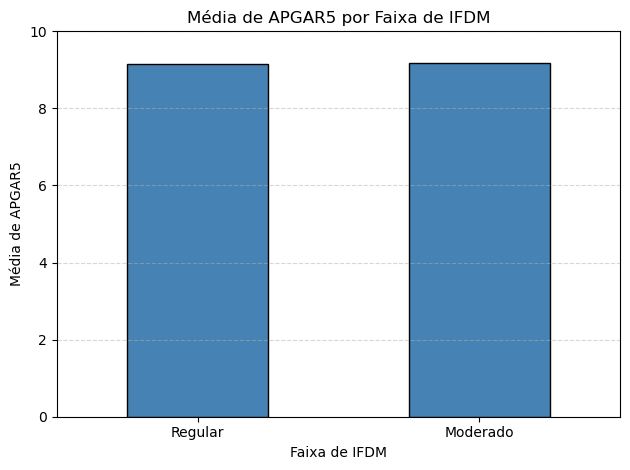

In [44]:
media_apgar.sort_values().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média de APGAR5 por Faixa de IFDM')
plt.xlabel('Faixa de IFDM')
plt.ylabel('Média de APGAR5')
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

--> A média de APGAR5 também não está relacionada ao IFDM, o que indica que o desenvolvimento do município como um todo não afeta a saúde do bebê nos primeiros minutos de vida.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [45]:
url_pib = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'

In [46]:
tabelas_pib = pd.read_html(url_pib, header=0)
tabelas_pib

[    Posição       Posição.1                  Município         PIB  Variação
 0   Em 2021  Mudança (2020)                  Município         PIB  Variação
 1         1             (0)                Porto Velho  20.059.522       NaN
 2         2             (0)                  Ji-Paraná   4.231.113       NaN
 3         3             (0)                    Vilhena   4.215.046       NaN
 4         4             (0)                  Ariquemes   3.209.761       NaN
 5         5             (0)                     Cacoal   2.792.383       NaN
 6         6             (0)                       Jaru   1.765.089       NaN
 7         7             (1)              Pimenta Bueno   1.642.516       NaN
 8         8             (1)             Rolim de Moura   1.565.194       NaN
 9         9             (0)              Guajará-Mirim   1.054.179       NaN
 10       10             (0)        Ouro Preto do Oeste     985.868       NaN
 11       11             (0)                    Buritis     966.

In [47]:
# transforma em dataframe
df_pib = tabelas_pib[0]
df_pib

,Posição,Posição.1,Município,PIB,Variação
0,Em 2021,Mudança (2020),Município,PIB,Variação
1,1,(0),Porto Velho,20.059.522,NaN
2,2,(0),Ji-Paraná,4.231.113,NaN
3,3,(0),Vilhena,4.215.046,NaN
4,4,(0),Ariquemes,3.209.761,NaN
5,5,(0),Cacoal,2.792.383,NaN
6,6,(0),Jaru,1.765.089,NaN
7,7,(1),Pimenta Bueno,1.642.516,NaN
8,8,(1),Rolim de Moura,1.565.194,NaN
9,9,(0),Guajará-Mirim,1.054.179,NaN


In [48]:
# remove o cabeçalho repetido
df_pib = df_pib[df_pib['PIB'] != 'PIB'].copy()

In [49]:
# remove os '.' e transforma os valores de PIB em int
df_pib['PIB'] = (
    df_pib['PIB']
    .astype(str)
    .str.replace('.', '', regex=False)
    .astype(int)
)

In [50]:
# cria uma função para classificar o PIB
def indice_pib(valor):
  if valor < 1000000:
    return 'Menor que 1 milhão'
  elif valor < 10000000:
    return 'Entre 1 e 10 milhões'
  else:
    return 'Maior que 10 milhões'

In [51]:
# aplica a função e cria a nova coluna 'Faixa'
df_pib['Faixa'] = df_pib['PIB'].apply(indice_pib)
df_pib.head()

,Posição,Posição.1,Município,PIB,Variação,Faixa
1,1,(0),Porto Velho,20059522,NaN,Maior que 10 milhões
2,2,(0),Ji-Paraná,4231113,NaN,Entre 1 e 10 milhões
3,3,(0),Vilhena,4215046,NaN,Entre 1 e 10 milhões
4,4,(0),Ariquemes,3209761,NaN,Entre 1 e 10 milhões
5,5,(0),Cacoal,2792383,NaN,Entre 1 e 10 milhões


In [52]:
# seleciona apenas as colunas desejadas
tabela_pib = df_pib[['Município', 'PIB', 'Faixa']].reset_index(drop=True)
tabela_pib

,Município,PIB,Faixa
0,Porto Velho,20059522,Maior que 10 milhões
1,Ji-Paraná,4231113,Entre 1 e 10 milhões
2,Vilhena,4215046,Entre 1 e 10 milhões
3,Ariquemes,3209761,Entre 1 e 10 milhões
4,Cacoal,2792383,Entre 1 e 10 milhões
5,Jaru,1765089,Entre 1 e 10 milhões
6,Pimenta Bueno,1642516,Entre 1 e 10 milhões
7,Rolim de Moura,1565194,Entre 1 e 10 milhões
8,Guajará-Mirim,1054179,Entre 1 e 10 milhões
9,Ouro Preto do Oeste,985868,Menor que 1 milhão


In [53]:
# tabela_pib
tabela_pib['municipio_padronizado'] = tabela_pib['Município'].apply(lambda x: unidecode.unidecode(str(x)).strip().lower())

In [54]:
df_merged_3 = pd.merge(sinasc, tabela_pib[['municipio_padronizado', 'PIB', 'Faixa']], 
            on='municipio_padronizado', how='left')

In [55]:
media_apgar = df_merged_3.groupby('Faixa')['APGAR5'].mean().round(2)
print(media_apgar)

Faixa
Entre 1 e 10 milhões    9.14
Maior que 10 milhões    9.21
Menor que 1 milhão      9.23
Name: APGAR5, dtype: float64


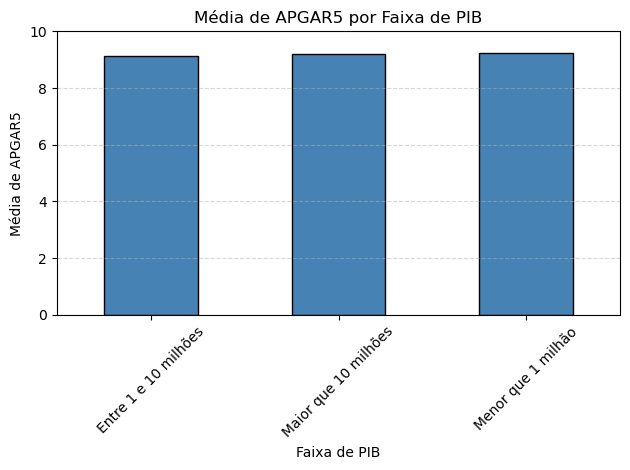

In [61]:
media_apgar.sort_values().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média de APGAR5 por Faixa de PIB')
plt.xlabel('Faixa de PIB')
plt.ylabel('Média de APGAR5')
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

--> E por fim, a média de APGAR5 mais uma vez não está relacionada com a variável PIB, afinal, um bebê pode nascer em uma cidade rica (PIB alto) e ter APGAR5 baixo por motivos puramente médicos

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

(resposta embaixo de cada questão)